# 1. Importing necessary libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.formula.api as sfa

# 2. Importing the data

In [2]:
toyota = pd.read_csv('ToyotaCorolla.csv')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# 3. Data Understanding 


* Model -- model of the car
* Price  -- Offer Price in EUROs	
* Age_08_04 -- Age in months as in August 2004	
* Mfg_Month -- Manufacturing month (1-12)	
* Mfg_Year	-- Manufacturing Year
* KM -- Accumulated Kilometers on odometer
* Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
* HP -- Horse Power
* Met_Color	 -- Metallic Color?  (Yes=1, No=0)
* Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
* Automatic	-- Automatic ( (Yes=1, No=0)
* cc -- Cylinder Volume in cubic centimeters
* Doors -- Number of doors
* Cylinders	-- Number of cylinders
* Gears -- Number of gear positions
* Quarterly_Tax -- Quarterly road tax in EUROs
* Weight -- Weight in Kilograms
* Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
* BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
* Guarantee_Period -- 	Guarantee period in months
* ABS -- Anti-Lock Brake System (Yes=1, No=0)
* Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
* Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
* Airco -- Airconditioning  (Yes=1, No=0)
* Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
* Boardcomputer -- Boardcomputer  (Yes=1, No=0)
* CD_Player -- CD Player  (Yes=1, No=0)
* Central_Lock -- Central Lock  (Yes=1, No=0)
* Powered_Windows -- Powered Windows  (Yes=1, No=0)
* Power_Steering -- Power Steering  (Yes=1, No=0)
* Radio -- Radio  (Yes=1, No=0)
* Mistlamps	-- Mistlamps  (Yes=1, No=0)
* Sport_Model -- Sport Model  (Yes=1, No=0)
* Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
* Metallic_Rim --Metallic Rim  (Yes=1, No=0)
* Radio_cassette -- Radio Cassette  (Yes=1, No=0)
* Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [3]:
toyota.shape

(1436, 38)

In [4]:
toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
toyota.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

# 4. Data Preprocessing


Input = Age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, Weight


Output = Price

In [8]:
toyota.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee',
           'BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player',
           'Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim',
           'Radio_cassette','Tow_Bar'],axis = 1, inplace = True)
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
print('Shape:\n',toyota.shape,'\n','Describe:\n',toyota.describe(),'\n',
      'Null Values:\n',toyota.isnull().sum(),'\n','Data Types:\n',toyota.dtypes)

Shape:
 (1436, 9) 
 Describe:
               Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000

In [14]:
scaler = MinMaxScaler()
toyota_scaled = scaler.fit_transform(toyota)
toyota_scaled

array([[0.3250444 , 0.27848101, 0.19335471, ..., 0.66666667, 0.72348485,
        0.26829268],
       [0.3339254 , 0.27848101, 0.30014938, ..., 0.66666667, 0.72348485,
        0.26829268],
       [0.3410302 , 0.29113924, 0.1716468 , ..., 0.66666667, 0.72348485,
        0.26829268],
       ...,
       [0.14742451, 0.88607595, 0.07002086, ..., 0.66666667, 0.18939394,
        0.02439024],
       [0.10301954, 0.87341772, 0.06960934, ..., 0.66666667, 0.18939394,
        0.02439024],
       [0.09236234, 0.94936709, 0.        , ..., 0.66666667, 0.        ,
        0.18536585]])

In [15]:
toyota_scaled = pd.DataFrame(data = toyota_scaled, columns= ['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])

In [16]:
toyota_scaled

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,0.333925,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,0.341030,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,0.376554,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,0.333925,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423
...,...,...,...,...,...,...,...,...,...
1431,0.111901,0.860759,0.084539,0.138211,0.000000,0.333333,0.666667,0.189394,0.040650
1432,0.230728,0.898734,0.078186,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1433,0.147425,0.886076,0.070021,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1434,0.103020,0.873418,0.069609,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390


In [17]:
toyota_scaled.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,0.226672,0.695533,0.282027,0.264245,0.018834,0.677809,0.675487,0.258040,0.117821
std,0.128844,0.235443,0.154348,0.121797,0.028870,0.317559,0.062837,0.155790,0.085595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145648,0.544304,0.176951,0.170732,0.006803,0.333333,0.666667,0.189394,0.065041
50%,0.197158,0.759494,0.260859,0.333333,0.020408,0.666667,0.666667,0.250000,0.113821
75%,0.269982,0.873418,0.358107,0.333333,0.020408,1.000000,0.666667,0.250000,0.138211
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 5. Assumption Testing

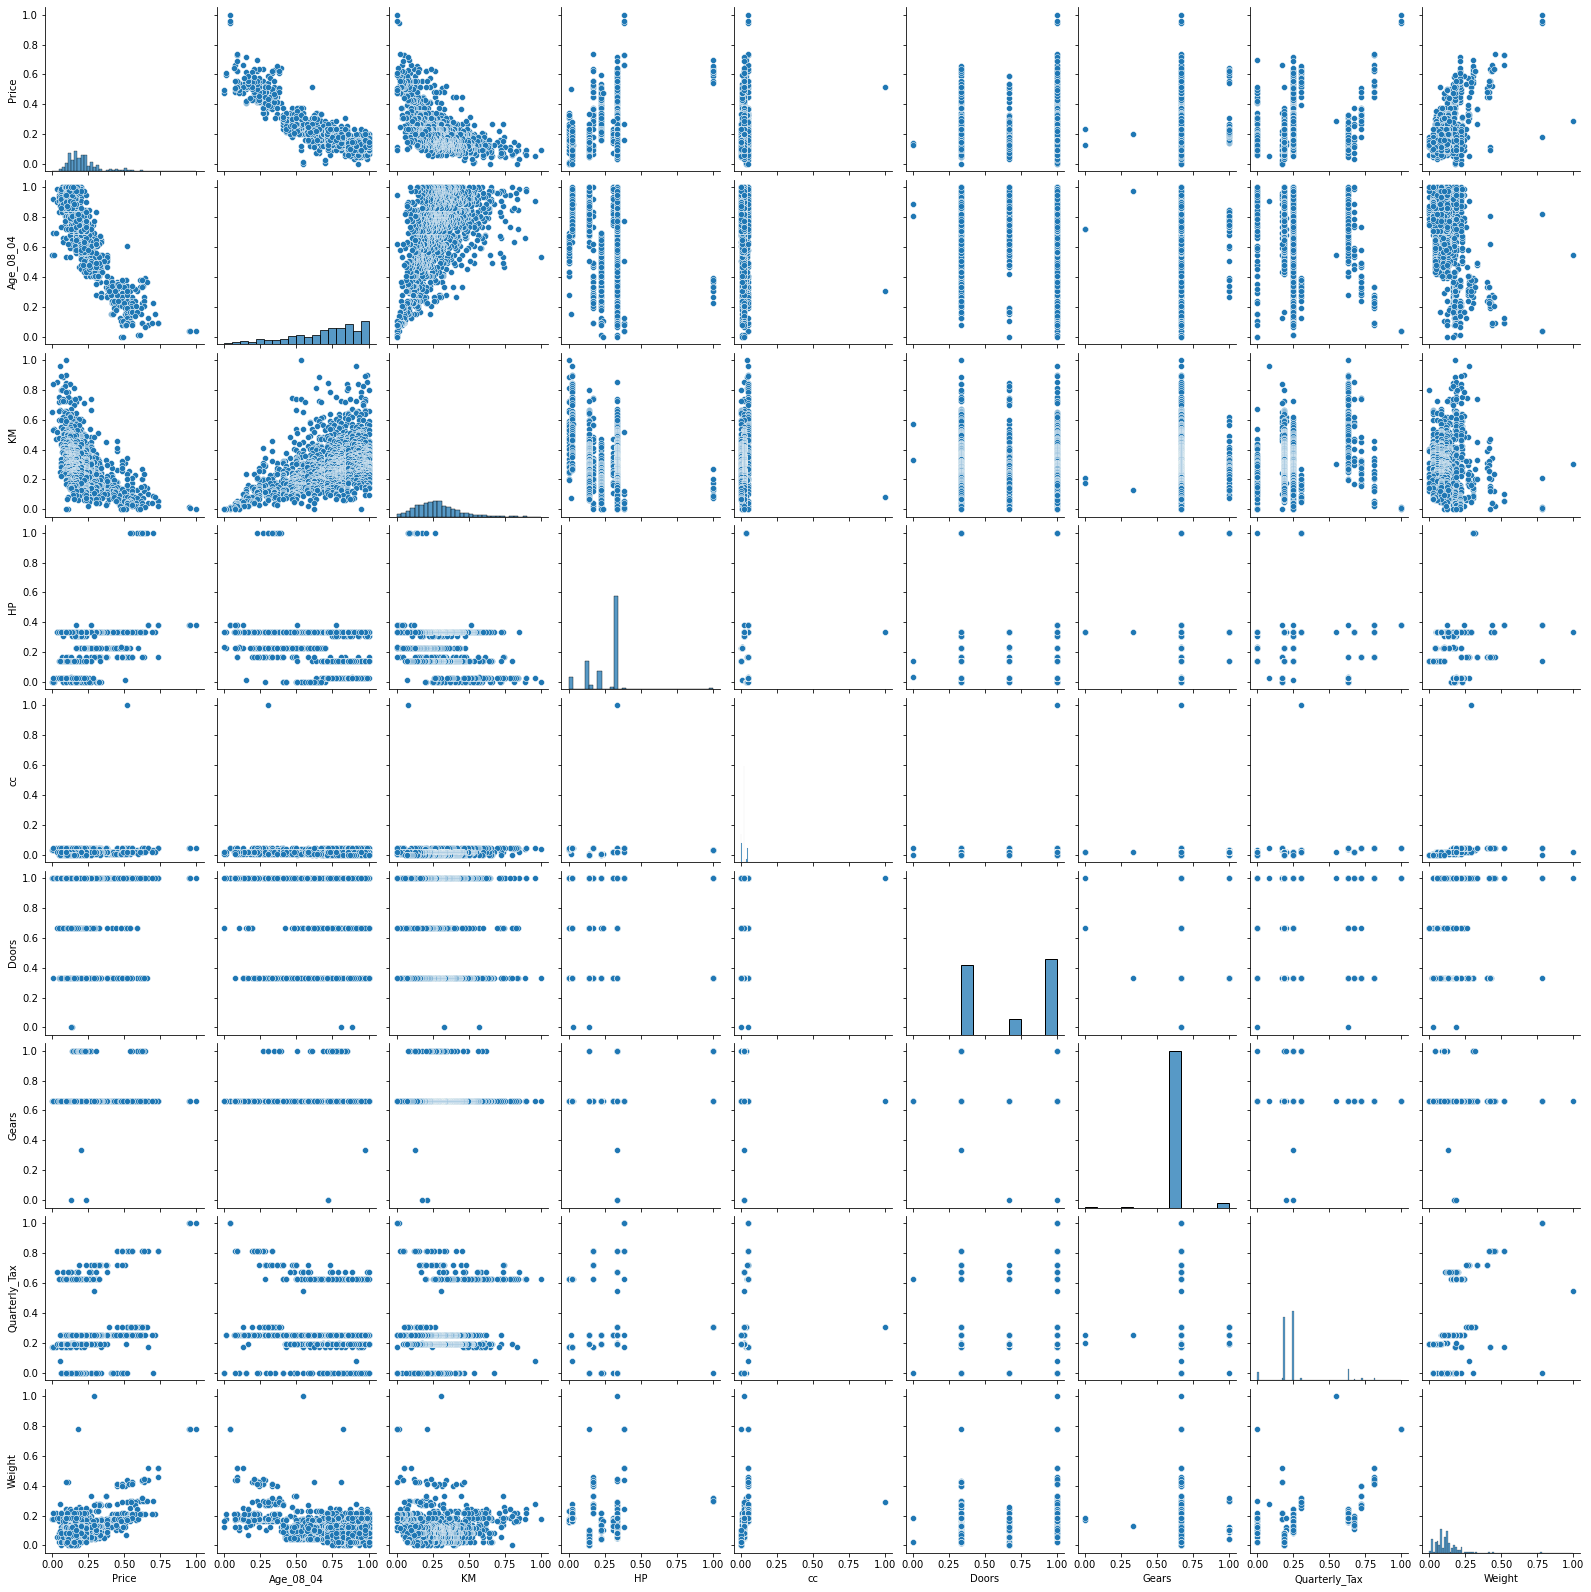

In [18]:
sns.pairplot(toyota_scaled)

In [19]:
toyota_scaled.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [20]:
#Variance Inflation factor
# MultiCollinearity 
import numpy as np
X = np.array(toyota_scaled)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
print(vif)
X=pd.DataFrame()

[21.011672180950068, 30.178440553390153, 8.865593046571982, 8.662228641139318, 1.6616222751019407, 5.986964853813201, 67.13388065642829, 8.683850829920258, 8.308788741209947]


Variance Inflation factor tells us about MultiCollinearity. Here no columns are highly co-related.

In [21]:
print('Mean:\n',toyota_scaled.mean(),'\n', 'Standard Deviation:\n',toyota_scaled.std())

Mean:
 Price            0.226672
Age_08_04        0.695533
KM               0.282027
HP               0.264245
cc               0.018834
Doors            0.677809
Gears            0.675487
Quarterly_Tax    0.258040
Weight           0.117821
dtype: float64 
 Standard Deviation:
 Price            0.128844
Age_08_04        0.235443
KM               0.154348
HP               0.121797
cc               0.028870
Doors            0.317559
Gears            0.062837
Quarterly_Tax    0.155790
Weight           0.085595
dtype: float64


# 6. Model Building

In [22]:
X = toyota_scaled[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
X

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423
...,...,...,...,...,...,...,...,...
1431,0.860759,0.084539,0.138211,0.000000,0.333333,0.666667,0.189394,0.040650
1432,0.898734,0.078186,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1433,0.886076,0.070021,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1434,0.873418,0.069609,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390


In [24]:
y = toyota_scaled[['Price']]
y

,Price
0,0.325044
1,0.333925
2,0.341030
3,0.376554
4,0.333925
...,...
1431,0.111901
1432,0.230728
1433,0.147425
1434,0.103020


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

In [26]:
print(X_train.shape)
print(y_train.shape)

(1148, 8)
(1148, 1)


In [27]:
print(X_test.shape)
print(y_test.shape)

(288, 8)
(288, 1)


# 7. Model Training 

In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train) # Model Training

LinearRegression()

In [29]:
print('Slope :',linear_model.coef_)
print('Intercept: ',linear_model.intercept_)

Slope : [[-0.32654645 -0.18721368  0.13054549 -0.06832322 -0.00181449  0.05642066
   0.02446133  0.44667012]]
Intercept:  [0.37741539]


# 8. Model Testing

In [30]:
X_test

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
634,0.772152,0.515121,0.382114,0.047619,1.000000,0.666667,0.628788,0.243902
719,0.848101,0.365458,0.333333,0.020408,0.333333,0.666667,0.189394,0.081301
1088,0.974684,0.534978,0.138211,0.000000,1.000000,0.666667,0.000000,0.024390
1251,0.886076,0.322055,0.333333,0.020408,0.333333,0.666667,0.189394,0.081301
1401,0.886076,0.196017,0.333333,0.020408,1.000000,0.666667,0.250000,0.121951
...,...,...,...,...,...,...,...,...
898,0.810127,0.246910,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1053,0.949367,0.754225,0.024390,0.047619,0.333333,0.666667,0.628788,0.186992
1409,0.936709,0.179914,0.333333,0.020408,1.000000,0.666667,0.250000,0.113821
221,0.544304,0.305232,0.333333,0.020408,1.000000,0.666667,0.545455,1.000000


In [31]:
y_test

,Price
634,0.163410
719,0.147425
1088,0.076377
1251,0.147425
1401,0.163410
...,...
898,0.163410
1053,0.049734
1409,0.126110
221,0.287744


In [32]:
y_pred  = linear_model.predict(X_test)
y_pred

array([[ 0.23558811],
       [ 0.15212938],
       [ 0.02371739],
       [ 0.14785461],
       [ 0.18988073],
       [ 0.3126854 ],
       [ 0.19783558],
       [ 0.13010192],
       [ 0.22925883],
       [ 0.1681939 ],
       [ 0.04263379],
       [ 0.15055173],
       [ 0.07296213],
       [ 0.46783996],
       [ 0.29544881],
       [ 0.17491479],
       [ 0.26321388],
       [ 0.46388136],
       [ 0.15630131],
       [ 0.13700878],
       [ 0.12869932],
       [ 0.43263878],
       [ 0.25618336],
       [ 0.03263464],
       [ 0.37476993],
       [ 0.35777208],
       [ 0.16982911],
       [ 0.22525862],
       [ 0.16161006],
       [ 0.21750313],
       [ 0.06603504],
       [ 0.39782262],
       [ 0.49792841],
       [ 0.23698652],
       [ 0.11617622],
       [ 0.11172149],
       [ 0.19407449],
       [ 0.18435927],
       [ 0.13838186],
       [ 0.12032027],
       [ 0.04992976],
       [ 0.12381662],
       [ 0.48238407],
       [ 0.11733899],
       [ 0.06232004],
       [ 0

# 9. Model Evaluation

In [33]:
print('Mean Squared Error:',mean_squared_error(y_test,y_pred),'\n','R2 Score:',r2_score(y_test,y_pred))

Mean Squared Error: 0.0025368598391257223 
 R2 Score: 0.8529887277854311


# 10. Model Optimization

In [34]:
m1 = sfa.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight',data = toyota_scaled).fit()

In [35]:
m1.summary()

#Null Hypothesis: HP is not significant feature for predicting MPG
#Alt  Hypothesis: HP is significant.

#Threshold as 0.05. So if p<0.05 --> reject the null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:05:31   Log-Likelihood:                 2336.7
No. Observations:                1436   AIC:                            -4655.
Df Residuals:                    1427   BIC:                            -4608.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3836      0.015     24.809      0.000       0.353       0.414
Age_08_04        -0.3414      0.007    -46.512      0.000      -0.356      -0.327
KM               -0.1797      0.011    -16.622      0.000      -0.201      -0.158
HP                0.1384      0.012     11.241      0.000       0.114       0.163
cc               -0.0632      0.047     -1.344      0.179      -0.156       0.029
Doors            -0.0002      0.004     -0.040      0.968      -0.009       0.008
Gears             0.0633      0.021      3.016      0.003       0.022       0.105
Quarterly_Tax     0.0370      0.012      3.015      0.003       0.013       0.061
Weight            0.3705      0.023     15.880      0.000       0.325       0.416
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
m2 = sfa.ols('Price ~ Age_08_04 + KM + HP + cc + Gears + Quarterly_Tax + Weight',data = toyota_scaled).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:06:40   Log-Likelihood:                 2336.7
No. Observations:                1436   AIC:                            -4657.
Df Residuals:                    1428   BIC:                            -4615.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3834      0.015     26.118      0.000       0.355       0.412
Age_08_04        -0.3414      0.007    -46.528      0.000      -0.356      -0.327
KM               -0.1797      0.011    -16.636      0.000      -0.201      -0.159
HP                0.1384      0.012     11.270      0.000       0.114       0.162
cc               -0.0632      0.047     -1.344      0.179      -0.155       0.029
Gears             0.0635      0.021      3.081      0.002       0.023       0.104
Quarterly_Tax     0.0371      0.012      3.027      0.003       0.013       0.061
Weight            0.3703      0.023     16.401      0.000       0.326       0.415
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OBSERVATION

1. m1 ->> RandD_Spend + Administration + Marketing_Spend + State --> Adj_R2 = 0.863 AIC = -4655
2. m2 ->> RandD_Spend + Administration + Marketing_Spend     --> Adj_R2 = 0.863, AIC = -4657

adj r2 score and aic of model 1 is better. so we choose model 1

# 11. Model Deployment

In [37]:
from pickle import dump

In [43]:
dump(m1,open('Toyota_Corolla.pkl','wb'))

In [44]:
from pickle import load

In [45]:
loaded_model = load(open('Toyota_Corolla.pkl','rb'))

In [46]:
loaded_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:11:33   Log-Likelihood:                 2336.7
No. Observations:                1436   AIC:                            -4655.
Df Residuals:                    1427   BIC:                            -4608.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3836      0.015     24.809      0.000       0.353       0.414
Age_08_04        -0.3414      0.007    -46.512      0.000      -0.356      -0.327
KM               -0.1797      0.011    -16.622      0.000      -0.201      -0.158
HP                0.1384      0.012     11.241      0.000       0.114       0.163
cc               -0.0632      0.047     -1.344      0.179      -0.156       0.029
Doors            -0.0002      0.004     -0.040      0.968      -0.009       0.008
Gears             0.0633      0.021      3.016      0.003       0.022       0.105
Quarterly_Tax     0.0370      0.012      3.015      0.003       0.013       0.061
Weight            0.3705      0.023     15.880      0.000       0.325       0.416
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""